In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Pacific_Extent = pd.read_excel(filepath, sheet_name='Pacific-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Pacific_Extent)
fp.date_time(Pacific_Extent)

,Extent,Date
0,668714.275,1979-01-01
1,566930.458,1979-02-01
2,688420.115,1979-03-01
3,859963.043,1979-04-01
4,1127120.160,1979-05-01
...,...,...
533,1134056.102,2023-06-01
534,1484824.377,2023-07-01
535,1671324.717,2023-08-01
536,1726376.097,2023-09-01


In [5]:
scaler = MinMaxScaler()
Pacific_Extent['Extent'] = scaler.fit_transform(Pacific_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 9
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Pacific_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((518, 12, 1), (518,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Pacific_model_LT9/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2390 - root_mean_squared_error: 0.4889

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 6s 78ms/step - loss: 0.2380 - root_mean_squared_error: 0.4879 - val_loss: 0.2235 - val_root_mean_squared_error: 0.4727
Epoch 2/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1886 - root_mean_squared_error: 0.4343

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 67ms/step - loss: 0.1851 - root_mean_squared_error: 0.4302 - val_loss: 0.1908 - val_root_mean_squared_error: 0.4368
Epoch 3/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1591 - root_mean_squared_error: 0.3989

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.1567 - root_mean_squared_error: 0.3958 - val_loss: 0.1716 - val_root_mean_squared_error: 0.4143
Epoch 4/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1283 - root_mean_squared_error: 0.3582

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.1282 - root_mean_squared_error: 0.3581 - val_loss: 0.1525 - val_root_mean_squared_error: 0.3905
Epoch 5/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1038 - root_mean_squared_error: 0.3222

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.1046 - root_mean_squared_error: 0.3234 - val_loss: 0.1347 - val_root_mean_squared_error: 0.3671
Epoch 6/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0811 - root_mean_squared_error: 0.2847

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0802 - root_mean_squared_error: 0.2831 - val_loss: 0.1188 - val_root_mean_squared_error: 0.3447
Epoch 7/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0640 - root_mean_squared_error: 0.2530

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0634 - root_mean_squared_error: 0.2518 - val_loss: 0.1043 - val_root_mean_squared_error: 0.3230
Epoch 8/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0513 - root_mean_squared_error: 0.2266

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 5s 86ms/step - loss: 0.0520 - root_mean_squared_error: 0.2280 - val_loss: 0.0844 - val_root_mean_squared_error: 0.2904
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0364 - root_mean_squared_error: 0.1907

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0366 - root_mean_squared_error: 0.1913 - val_loss: 0.0597 - val_root_mean_squared_error: 0.2443
Epoch 10/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0278 - root_mean_squared_error: 0.1668

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0289 - root_mean_squared_error: 0.1701 - val_loss: 0.0511 - val_root_mean_squared_error: 0.2261
Epoch 11/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0230 - root_mean_squared_error: 0.1518

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0226 - root_mean_squared_error: 0.1505 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1982
Epoch 12/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0218 - root_mean_squared_error: 0.1478

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0203 - root_mean_squared_error: 0.1423 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1577
Epoch 13/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.1283

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0161 - root_mean_squared_error: 0.1267 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1478
Epoch 14/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.1159

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1183
Epoch 15/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.1063

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.0114 - root_mean_squared_error: 0.1070 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1073
Epoch 16/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0137 - root_mean_squared_error: 0.1169

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0134 - root_mean_squared_error: 0.1159 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0981
Epoch 17/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.0896

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0090 - root_mean_squared_error: 0.0951 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0775
Epoch 18/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0122 - root_mean_squared_error: 0.1103 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1096
Epoch 19/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0129 - root_mean_squared_error: 0.1136 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0843
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0813
Epoch 21/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1136

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0130 - root_mean_squared_error: 0.1140 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0761
Epoch 22/50
52/53 [============================>.] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1091

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0120 - root_mean_squared_error: 0.1094 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0730
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0737
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0102 - root_mean_squared_error: 0.1012 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0744
Epoch 25/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0745
Epoch 26/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0108 - root_mean_squared_error: 0.1038 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762
Epoch 27/50
53/53 [==============================] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1115

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0124 - root_mean_squared_error: 0.1115 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0715
Epoch 28/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0107 - root_mean_squared_error: 0.1034 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0761
Epoch 29/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0118 - root_mean_squared_error: 0.1086 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0846
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0722
Epoch 31/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0121 - root_mean_squared_error: 0.1102 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0786
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0111 - root_mean_squared_error: 0.1054 - val_loss: 0.0053 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0111 - root_mean_squared_error: 0.1055 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0710
Epoch 34/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0109 - root_mean_squared_error: 0.1043 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0981
Epoch 35/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0138 - root_mean_squared_error: 0.1173 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0104 - root_mean_squared_error: 0.1020 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0734
Epoch 37/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0817
Epoch 38/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0098 - root_mean_squared_error: 0.0991 - val_loss: 0.0056 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 42/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0898
Epoch 43/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0118 - root_mean_squared_error: 0.1086 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 44/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0108 - root_mean_squared_error: 0.1038 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0959
Epoch 45/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0121 - root_mean_squared_error: 0.1102 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 46/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0101 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


INFO:tensorflow:Assets written to: Pacific_model_LT9\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0126 - root_mean_squared_error: 0.1123 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 50/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0099 - root_mean_squared_error: 0.0997 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0763


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.6334175944328309 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

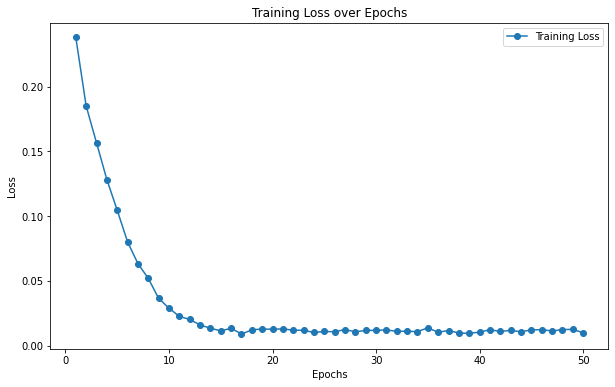

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

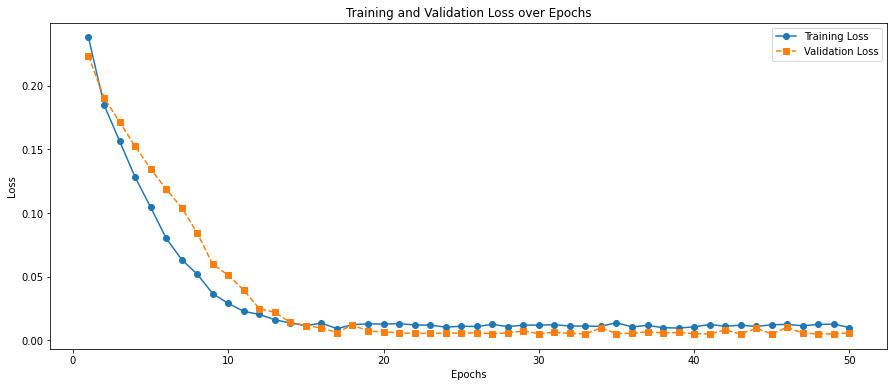

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Pacific_model_LT9/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.06912124514564374
MAE : 0.05566485788461894


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,5.339965e+05,635624.004
1,4.412492e+05,460009.672
2,5.261425e+05,610848.036
3,7.850098e+05,819257.445
4,1.098930e+06,1129627.707
5,1.491721e+06,1463383.236
6,1.702611e+06,1614536.727
7,1.958842e+06,1862498.612
8,2.038351e+06,2099349.296
9,1.807056e+06,1981614.046


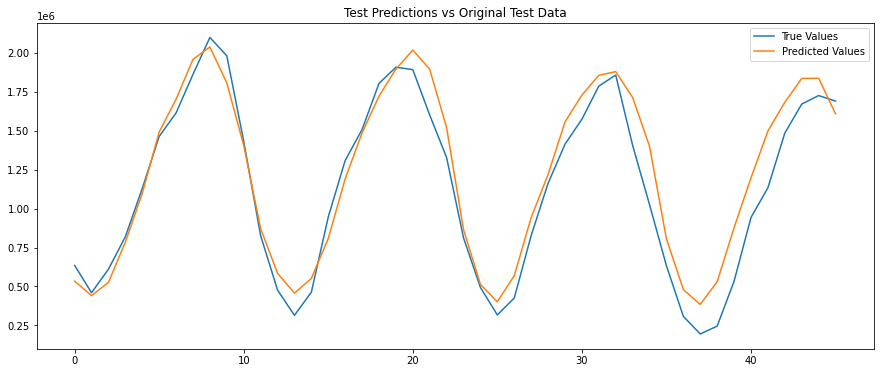

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

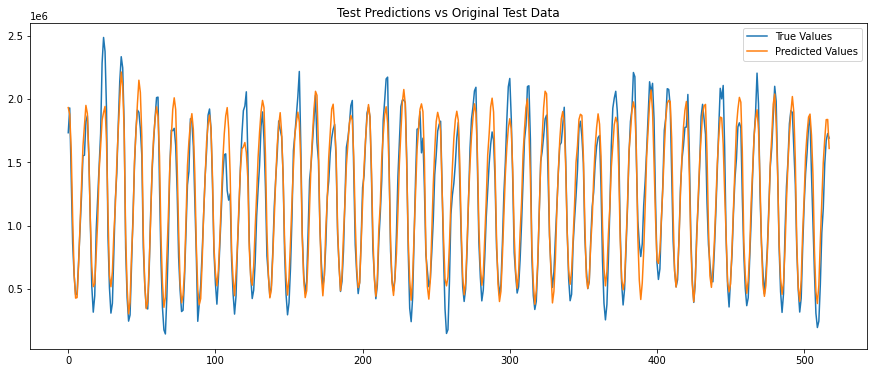

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()